In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Cardiotocographic.csv')
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


Data Cleaning and Preparation

In [3]:
#Check for Missing Values
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [6]:
#Check and Convert Data Types
df.info()
df = df.apply(pd.to_numeric, errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [5]:
#Detect and Remove Outliers (IQR Method)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


##Step 4: Statistical Summary

Descriptive Statistics

In [7]:
summary_stats = df_clean.describe().T
summary_stats['median'] = df_clean.median()
summary_stats['IQR'] = Q3 - Q1
summary_stats


,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,885.0,131.846366,9.453055,106.000000,125.000000,133.000000,138.000000,160.000000,133.000000,14.000000
AC,885.0,0.004094,0.003752,-0.000122,0.000000,0.003358,0.006747,0.014068,0.003358,0.005650
FM,898.0,0.000604,0.001344,-0.002467,0.000000,0.000000,0.000303,0.006272,0.000000,0.002567
UC,898.0,0.004965,0.002706,-0.000101,0.003145,0.005045,0.006928,0.012072,0.005045,0.004685
DL,898.0,0.001543,0.002213,-0.000124,0.000000,0.000000,0.003076,0.008197,0.000000,0.003289
DS,885.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,885.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,898.0,42.453496,15.055401,15.000000,29.000000,41.000000,56.000000,79.000000,41.000000,29.000000
MSTV,898.0,1.273574,0.541507,0.300000,0.900000,1.200000,1.600000,3.200000,1.200000,1.000000
ALTV,898.0,3.146072,6.027415,-1.043619,0.000000,0.000000,4.000000,27.000000,0.000000,11.000000


##Step 5: Data Visualization

Histograms

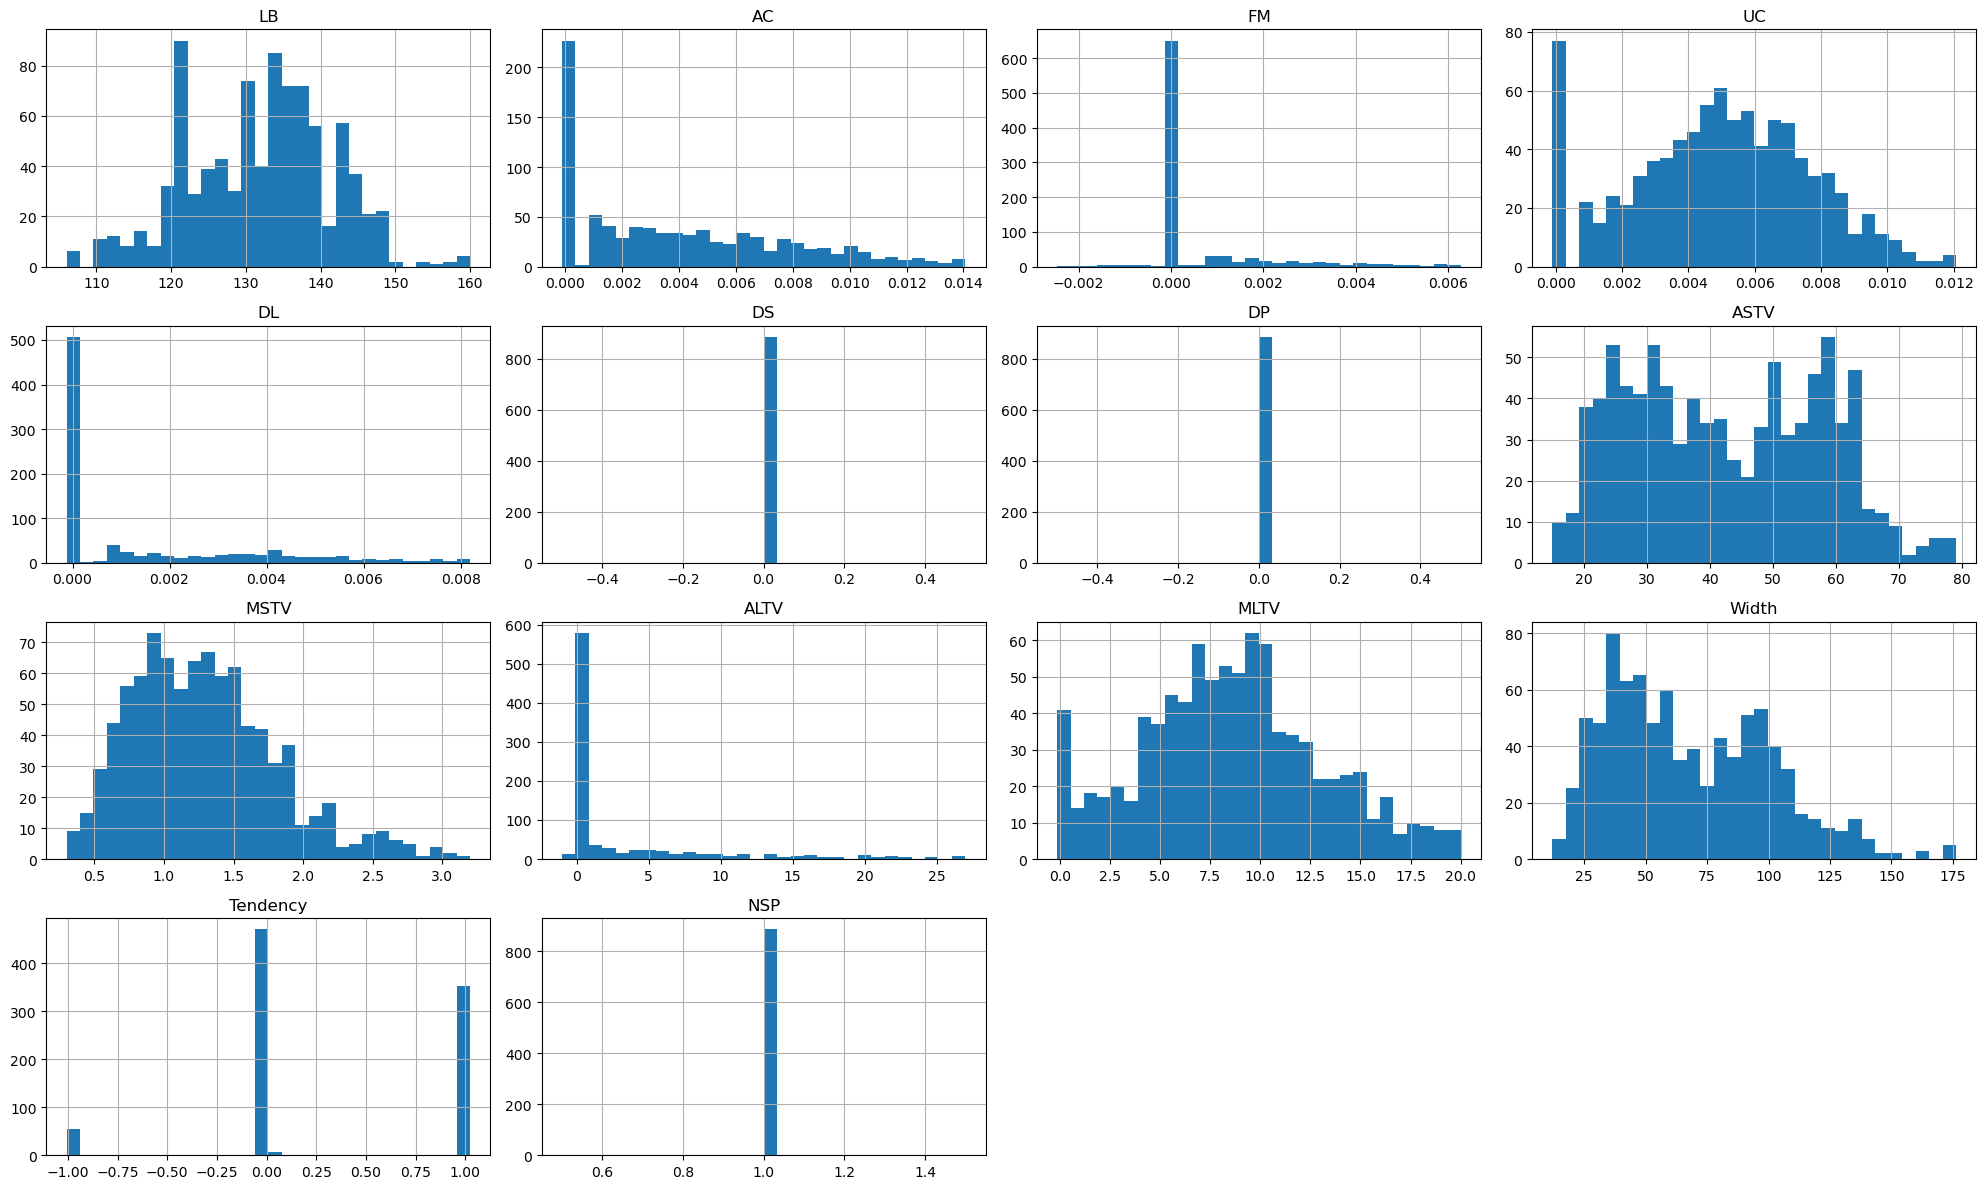

In [8]:
df_clean.hist(bins=30, figsize=(20, 12))
plt.tight_layout()
plt.show()


 Boxplots

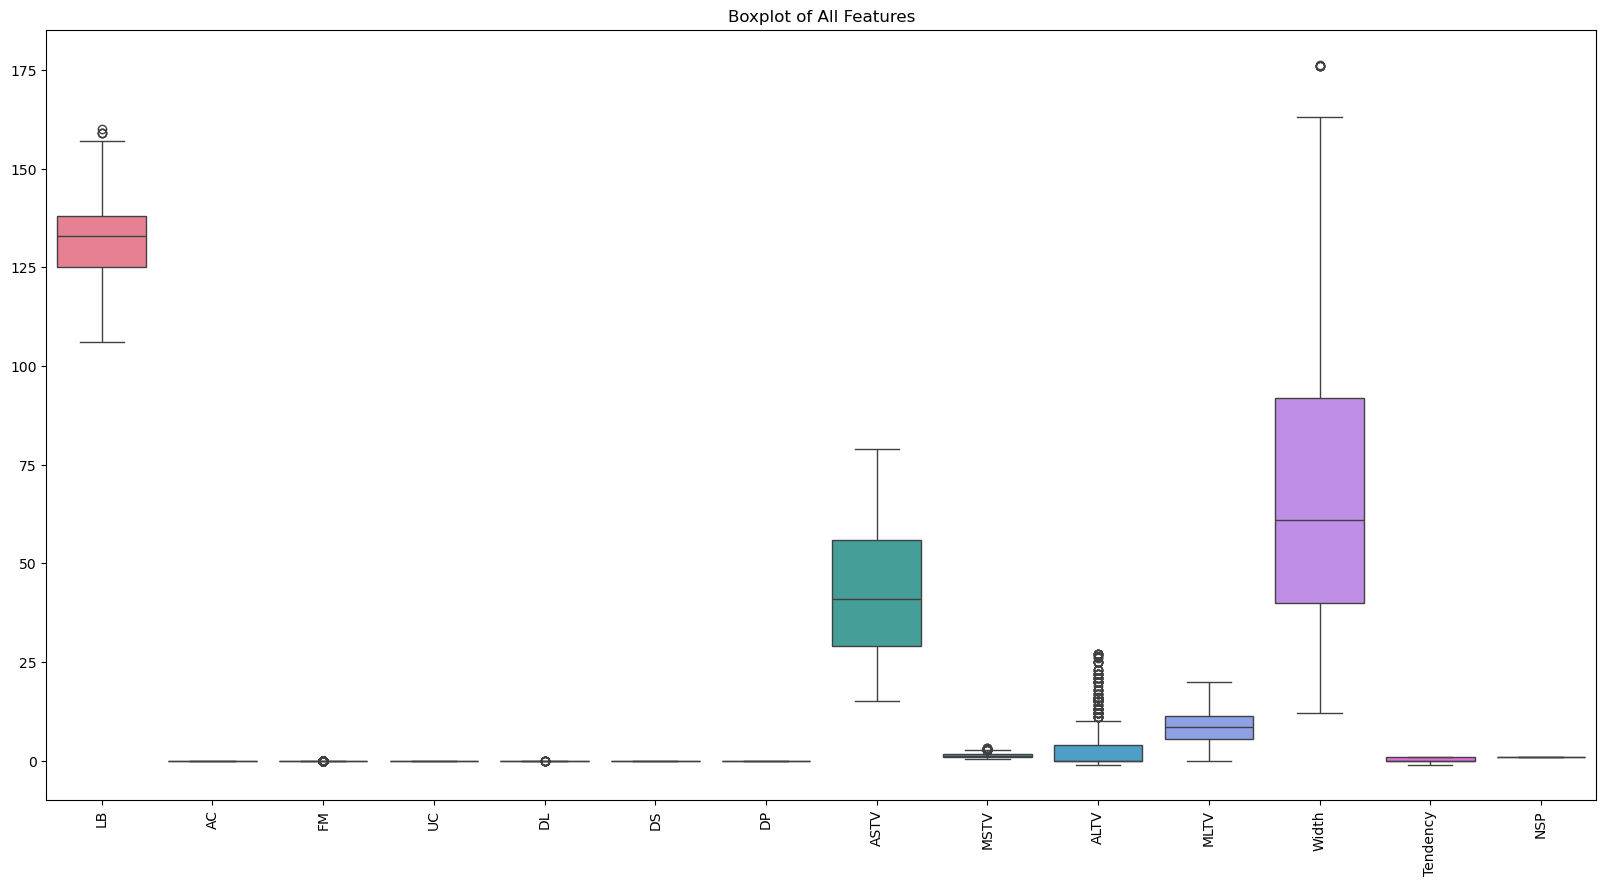

In [9]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_clean)
plt.xticks(rotation=90)
plt.title('Boxplot of All Features')
plt.show()


Correlation Heatmap

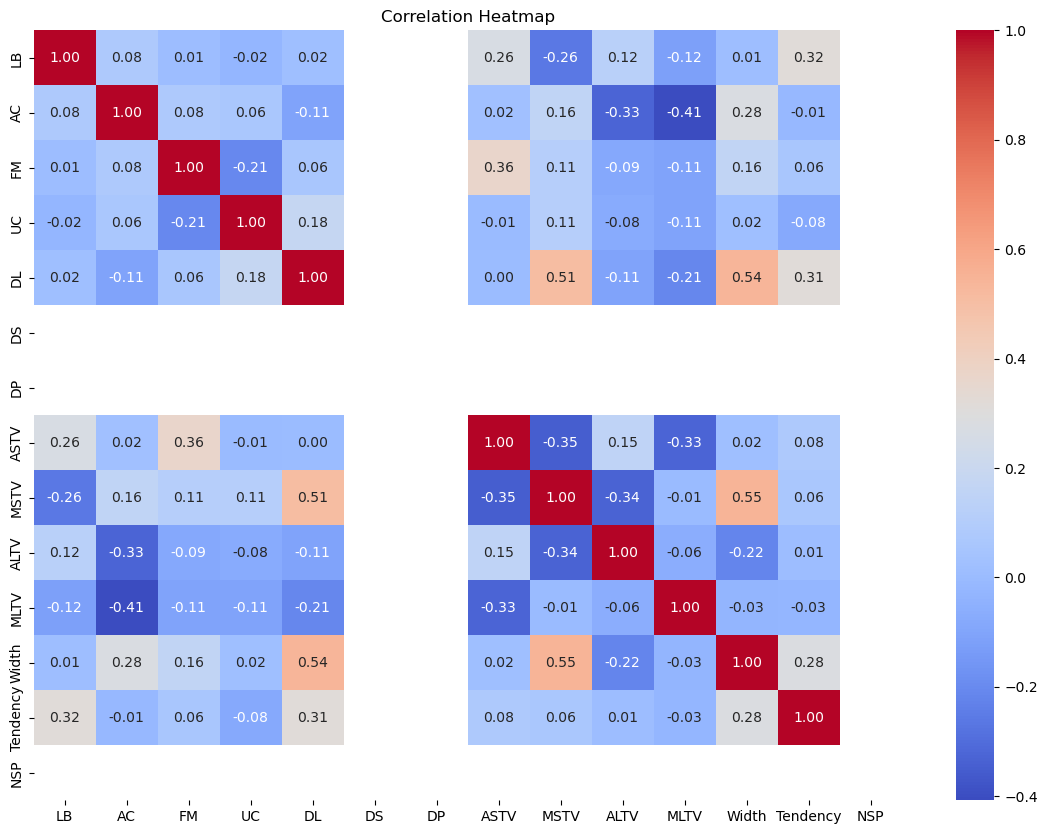

In [10]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


5.4 Pairplot (sampled for performance)

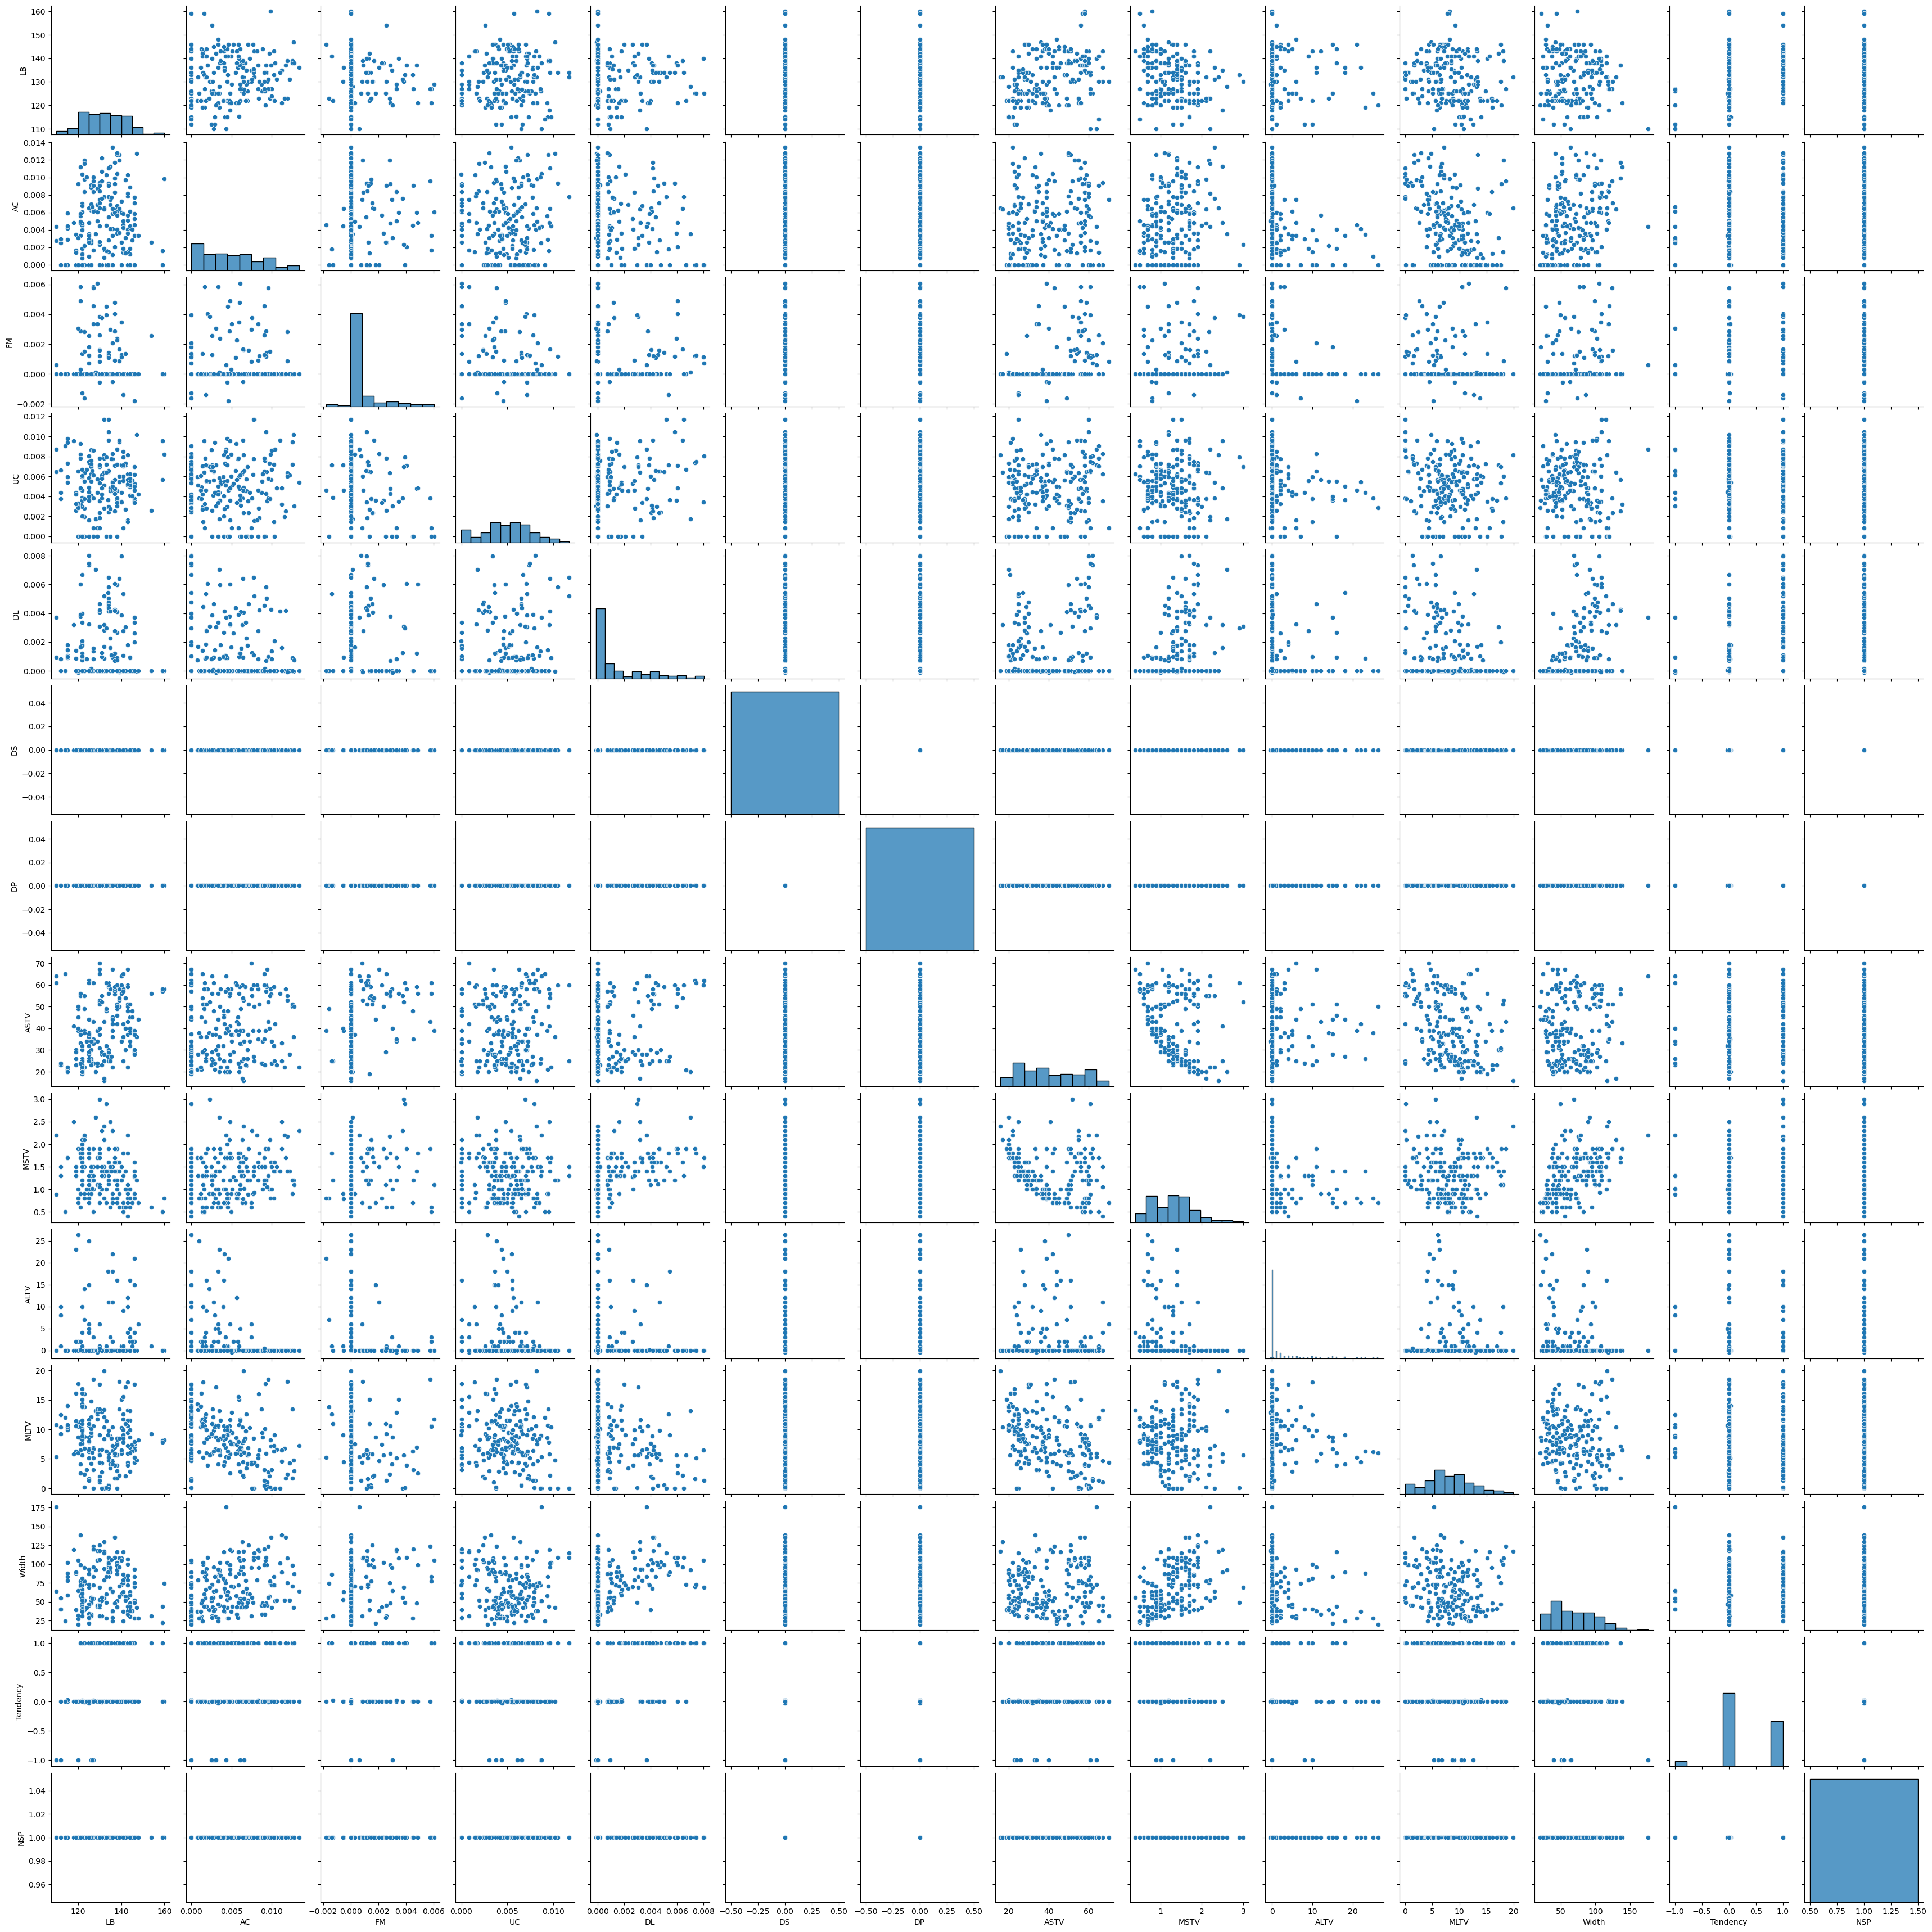

In [11]:
sns.pairplot(df_clean.sample(n=200))
plt.show()


#5.5 Violin Plots (Selected Features)



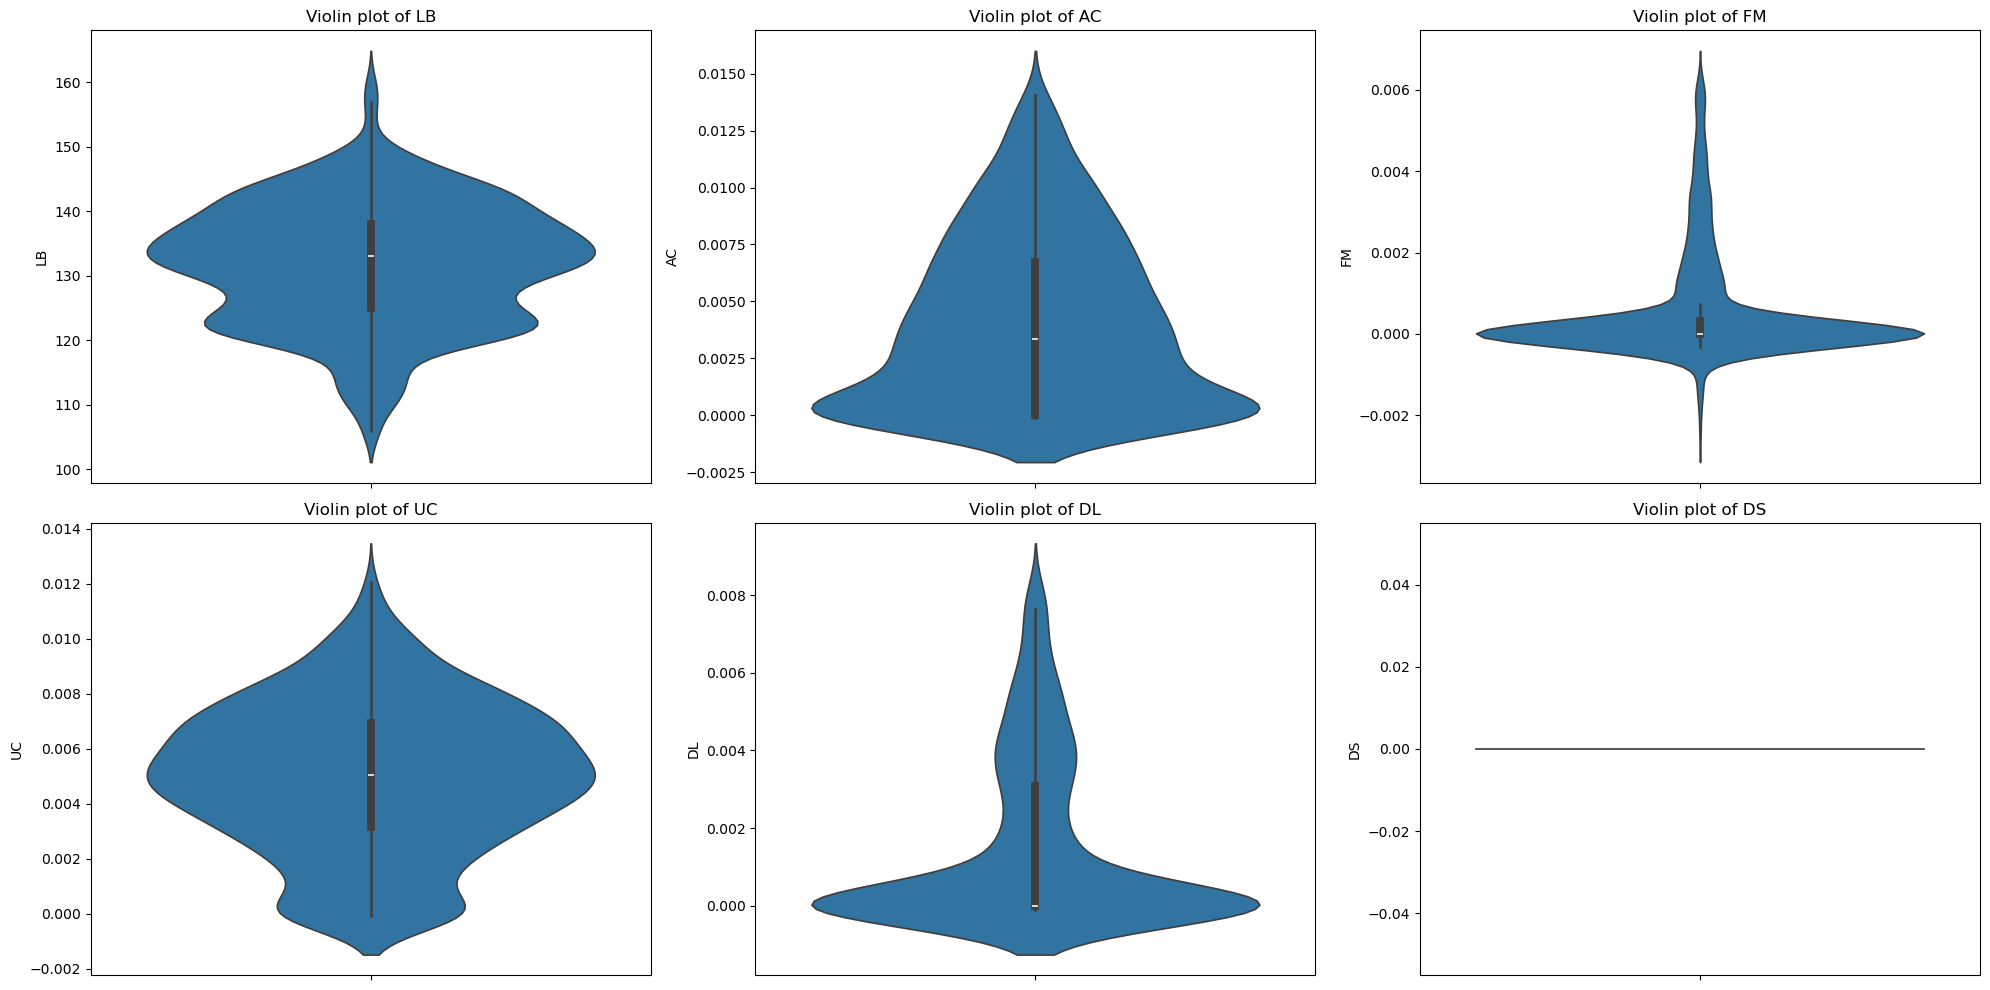

In [12]:
selected_columns = df_clean.columns[:6]
plt.figure(figsize=(20, 10))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(y=df_clean[col])
    plt.title(f'Violin plot of {col}')
plt.tight_layout()
plt.show()


Step 6: Pattern Recognition and Insights

In [13]:
corr_matrix = df_clean.corr()
high_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix != 1.0)]
high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)


""
